In [92]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [93]:
df=pd.read_csv("df.csv")
df.head()


,id,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2283743,2,2019-02-19T08:02:58Z,2019-02-19T08:32:22Z,33.729698,-84.392586,33.729698,-84.392586,0.00,Right hand shoulder blocked due to accident on...,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-1567861,2,2017-02-13T20:51:52Z,2017-02-13T21:21:39Z,43.194069,-83.727097,NaN,NaN,0.01,Accident on M-54 Saginaw Rd near Tuscola Rd.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-423709,2,2020-05-22T18:20:00Z,2020-05-22T19:11:35Z,34.000071,-118.409001,34.000071,-118.409001,0.00,At Braddock Dr/Exit 51 - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-864136,2,2020-03-03T07:47:18Z,2020-03-03T09:17:12Z,32.675549,-96.757278,32.675549,-96.757278,0.00,Accident on Simpson Stuart Rd at Flagstaff Dr.,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2792470,2,2020-01-22T08:05:34Z,2020-01-22T12:05:34Z,42.879050,-121.831060,42.879050,-121.831060,0.00,At Silver Lake Rd/W Boundary Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [318]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     5000 non-null   object             
 1   Severity               5000 non-null   int64              
 2   Start_Time             5000 non-null   datetime64[ns, UTC]
 3   End_Time               5000 non-null   object             
 4   Start_Lat              5000 non-null   float64            
 5   Start_Lng              5000 non-null   float64            
 6   End_Lat                4506 non-null   float64            
 7   End_Lng                4506 non-null   float64            
 8   Distance(mi)           5000 non-null   float64            
 9   Description            5000 non-null   object             
 10  Number                 1697 non-null   float64            
 11  Street                 5000 non-null   object           

### Let's check the accidents severity data and its relation with start time

In [94]:
df.Severity.value_counts()
df['Start_Time']= pd.to_datetime(df['Start_Time'])


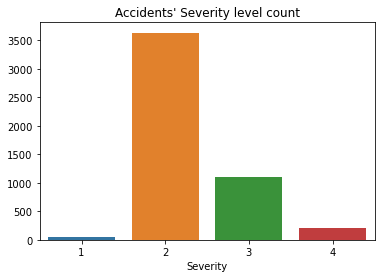

In [637]:
sb.countplot(data=df,x='Severity');
plt.ylabel("")
plt.title("Accidents' Severity level count");

That shows that accidents with Severity 2 in the most common then comes accidents with severity 3

In [618]:
df["start_hour"]=df.Start_Time.dt.hour


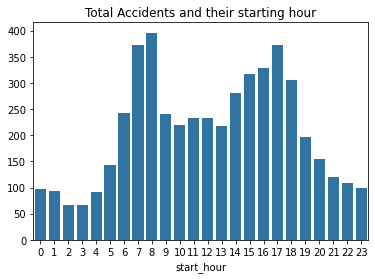

In [639]:
colors=sb.color_palette()[0]
sb.countplot(data=df,x='start_hour',color=colors);
plt.title("Total Accidents and their starting hour");
plt.ylabel("");

start time data is bimodal

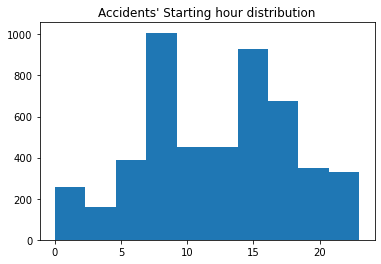

In [641]:
plt.hist(data=df,x="start_hour");
plt.title("Accidents' Starting hour distribution");

Start hour data is bimodal

In [628]:
df1 = (df.groupby(['start_hour','Severity']).Severity.sum().unstack())
df1.head()

Severity,1,2,3,4
start_hour,,,,
0,NaN,146.0,36.0,48.0
1,NaN,150.0,45.0,12.0
2,NaN,112.0,27.0,8.0
3,NaN,112.0,21.0,12.0
4,NaN,130.0,63.0,24.0


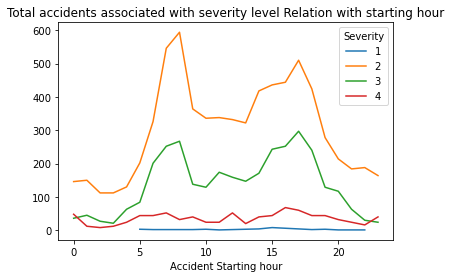

In [632]:
df1.plot();
plt.title("Total accidents associated with severity level Relation with starting hour");
plt.xlabel("Accident Starting hour");

accidents with severity 2 are the most occurring , and for severity 2 and 3 most accidents occur between 5 to 10 and 15 to 20

### Let's check relation between Weather Condition and severity

In [484]:
#get weather conditions that causes more accidents than mean of total accidents
counts=df.Weather_Condition.value_counts()
mean_Count=counts.mean()

In [487]:
df2=df[df.Weather_Condition.isin(counts[counts> mean_Count].index)]
df2.Weather_Condition.value_counts()

Fair                1176
Clear                843
Mostly Cloudy        666
Partly Cloudy        474
Cloudy               440
Overcast             425
Light Rain           234
Scattered Clouds     194
Name: Weather_Condition, dtype: int64

In [488]:
df3 = (df2.groupby(['Weather_Condition','Severity']).Weather_Condition.count().unstack())
df3

Severity,1,2,3,4
Weather_Condition,,,,
Clear,NaN,554.0,245.0,44.0
Cloudy,3.0,357.0,62.0,18.0
Fair,31.0,966.0,138.0,41.0
Light Rain,1.0,174.0,54.0,5.0
Mostly Cloudy,11.0,454.0,179.0,22.0
Overcast,NaN,274.0,131.0,20.0
Partly Cloudy,3.0,336.0,117.0,18.0
Scattered Clouds,NaN,120.0,65.0,9.0


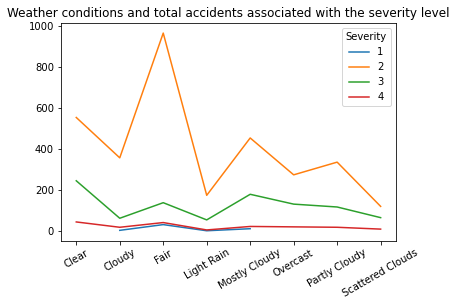

In [625]:
df3.plot();
plt.xticks(rotation='30');
plt.xlabel("")
plt.title("Weather conditions and total accidents associated with the severity level");

it's shows that most accidents occurred in Fair conditions and they have Severity 2

### Check If there're specific streets has bigger occurrence

In [617]:
#filter with severity 2 and 3 as they are the most common accidents
df4=df.query("Severity==2 or Severity==3 ")
df4.head()

,id,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,start_hour
0,A-2283743,2,2019-02-19 08:02:58+00:00,2019-02-19T08:32:22Z,33.729698,-84.392586,33.729698,-84.392586,0.00,Right hand shoulder blocked due to accident on...,...,False,False,False,False,False,Day,Day,Day,Day,8
1,A-1567861,2,2017-02-13 20:51:52+00:00,2017-02-13T21:21:39Z,43.194069,-83.727097,NaN,NaN,0.01,Accident on M-54 Saginaw Rd near Tuscola Rd.,...,False,False,False,False,False,Night,Night,Night,Night,20
2,A-423709,2,2020-05-22 18:20:00+00:00,2020-05-22T19:11:35Z,34.000071,-118.409001,34.000071,-118.409001,0.00,At Braddock Dr/Exit 51 - Accident.,...,False,False,False,True,False,Day,Day,Day,Day,18
3,A-864136,2,2020-03-03 07:47:18+00:00,2020-03-03T09:17:12Z,32.675549,-96.757278,32.675549,-96.757278,0.00,Accident on Simpson Stuart Rd at Flagstaff Dr.,...,False,False,False,False,False,Day,Day,Day,Day,7
4,A-2792470,2,2020-01-22 08:05:34+00:00,2020-01-22T12:05:34Z,42.879050,-121.831060,42.879050,-121.831060,0.00,At Silver Lake Rd/W Boundary Rd - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,8


In [646]:
#select streets with more than 20 accidents
counts=df.Street.value_counts()
df4=df4[df4.Street.isin(counts[counts> 20].index)]


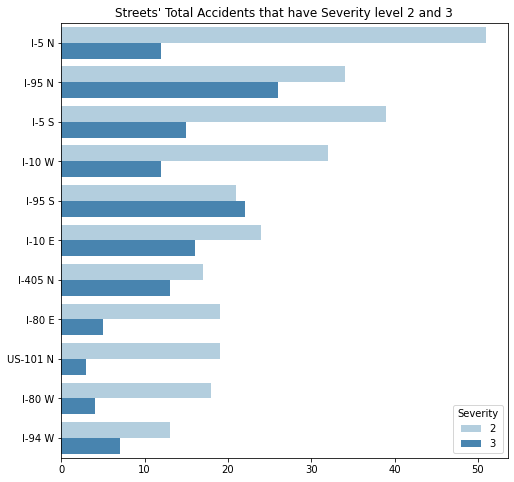

In [645]:
plt.figure(figsize=(8,8))
default_color = sb.color_palette()[0]

sb.countplot(data=df4,y="Street",hue="Severity",palette="Blues",order=df4.Street.value_counts().index);
plt.ylabel("");
plt.xlabel("");

plt.title("Streets' Total Accidents that have Severity level 2 and 3");

That shows that I-5 N street has the most occurring accidents with severity 2 then comes I-5 S  
but I-95 N has the most occurring accidents with severity 3 then comes I-95 S